# APPLE MUSIC EDA PROJECT pt.1

In this project, we are going to explore my personal music streaming data from Apple Music. Apple Music is a music and video streaming service developed by Apple Inc. The dataset used here showcases my personal streaming on the platform.

We can see many things in the dataset like

- List of songs played
- List of Singers/Artists
- Start time and position of songs
- Music Labels

and much more.

I got this data from Apple's privacy website.

## Data Preparation and cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly_express as px
import kaleido

In [2]:
sns.set(rc={"figure.figsize":(12, 6)})

In [3]:
filepath = 'Apple Music Play Activity.csv'

In [4]:
music_df = pd.read_csv(filepath)

In [5]:
music_df.head()

Apple ID Number Apple Music Subscription Artist Name  \
0       8080964677                     True        CKay   
1       8080964677                     True    DanDizzy   
2       8080964677                     True      Khalid   
3       8080964677                     True       Migos   
4       8080964677                     True       Migos   

                                       Build Version Client IP Address  \
0                                                NaN    41.184.227.168   
1  Music/3.1 iOS/12.3.1 model/iPhone9,3 hwp/t8010...    105.112.50.152   
2  Music/3.1 iOS/12.1.2 model/iPhone7,2 hwp/t7000...     41.203.93.115   
3  Music/3.1 iOS/14.2 model/iPhone11,8 hwp/t8020 ...   105.112.186.129   
4  Music/3.1 iOS/14.2 model/iPhone11,8 hwp/t8020 ...   105.112.186.129   

                          Device Identifier  End Position In Milliseconds  \
0                              unknown-guid                           0.0   
1  67b33bee274d9d9c174173f987728c06f1fde285                      184830.0   
2  e237c5cedc48b502fd85c611a7dc903b687379b8                      209606.0   
3                 00008020-000A54C62E8A002E                       28470.0   
4                 00008020-000A54C62E8A002E                        9947.0   

            End Reason Type       Event End Timestamp Event Reason Hint Type  \
0    TRACK_SKIPPED_FORWARDS  2022-02-20T20:15:43.618Z          NOT_SPECIFIED   
1      NATURAL_END_OF_TRACK  2019-07-22T17:24:17.954Z          NOT_SPECIFIED   
2      NATURAL_END_OF_TRACK  2019-01-01T12:53:23.511Z          NOT_SPECIFIED   
3  PLAYBACK_MANUALLY_PAUSED  2020-12-10T20:56:45.550Z          NOT_SPECIFIED   
4                 SCRUB_END  2020-12-10T20:56:49.556Z          NOT_SPECIFIED   

   ... Session Is Shared Shared Activity Devices-Current  \
0  ...             False                             NaN   
1  ...               NaN                             NaN   
2  ...               NaN                             NaN   
3  ...               NaN                             NaN   
4  ...               NaN                             NaN   

  Shared Activity Devices-Max                         Song Name  \
0                         NaN      Show My Side (feat. Amaarae)   
1                         NaN                 Uncle Shuga Daddy   
2                         NaN                   Saturday Nights   
3                         NaN  Kelly Price (feat. Travis Scott)   
4                         NaN  Kelly Price (feat. Travis Scott)   

          Source Type  Start Position In Milliseconds Store Front Name  \
0  ORIGINATING_DEVICE                               0          Nigeria   
1  ORIGINATING_DEVICE                               0          Nigeria   
2  ORIGINATING_DEVICE                               0          Nigeria   
3  ORIGINATING_DEVICE                           26072          Nigeria   
4  ORIGINATING_DEVICE                           15915          Nigeria   

   User’s Audio Quality User’s Playback Format  UTC Offset In Seconds  
0                   NaN                    NaN                 3600.0  
1                   NaN                    NaN                 3600.0  
2                   NaN                    NaN                 3600.0  
3                   NaN                    NaN                 3600.0  
4                   NaN                    NaN                 3600.0  

[5 rows x 38 columns]

In [6]:
#Check data shape
print(f'Rows x Colums: {music_df.shape}')

Rows x Colums: (123261, 38)


In [7]:
#Check column names
music_df.columns.to_list()

['Apple ID Number',
 'Apple Music Subscription',
 'Artist Name',
 'Build Version',
 'Client IP Address',
 'Device Identifier',
 'End Position In Milliseconds',
 'End Reason Type',
 'Event End Timestamp',
 'Event Reason Hint Type',
 'Event Received Timestamp',
 'Event Start Timestamp',
 'Event Type',
 'Feature Name',
 'Item Type',
 'Media Duration In Milliseconds',
 'Media Type',
 'Metrics Bucket Id',
 'Metrics Client Id',
 'Milliseconds Since Play',
 'Offline',
 'Play Duration Milliseconds',
 'Provided Audio Bit Depth',
 'Provided Audio Channel',
 'Provided Audio Sample Rate',
 'Provided Bit Rate',
 'Provided Codec',
 'Provided Playback Format',
 'Session Is Shared',
 'Shared Activity Devices-Current',
 'Shared Activity Devices-Max',
 'Song Name',
 'Source Type',
 'Start Position In Milliseconds',
 'Store Front Name',
 'User’s Audio Quality',
 'User’s Playback Format',
 'UTC Offset In Seconds']

Displaying basic stats

In [8]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123261 entries, 0 to 123260
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Apple ID Number                  123261 non-null  int64  
 1   Apple Music Subscription         123223 non-null  object 
 2   Artist Name                      119750 non-null  object 
 3   Build Version                    115930 non-null  object 
 4   Client IP Address                120024 non-null  object 
 5   Device Identifier                123260 non-null  object 
 6   End Position In Milliseconds     122036 non-null  float64
 7   End Reason Type                  120572 non-null  object 
 8   Event End Timestamp              122036 non-null  object 
 9   Event Reason Hint Type           120573 non-null  object 
 10  Event Received Timestamp         123261 non-null  object 
 11  Event Start Timestamp            117579 non-null  object 
 12  Ev

In [9]:
music_df.describe()

Apple ID Number  End Position In Milliseconds  \
count     1.232610e+05                  1.220360e+05   
mean      8.080965e+09                  1.972363e+05   
std       0.000000e+00                  3.391455e+06   
min       8.080965e+09                 -1.348178e+07   
25%       8.080965e+09                  3.693750e+03   
50%       8.080965e+09                  1.008215e+05   
75%       8.080965e+09                  1.891762e+05   
max       8.080965e+09                  4.205080e+08   

       Media Duration In Milliseconds  Metrics Bucket Id  \
count                    1.230580e+05      110412.000000   
mean                     2.189928e+05        5959.233072   
std                      2.630183e+05        2557.355500   
min                      0.000000e+00         259.000000   
25%                      1.819510e+05        2852.000000   
50%                      2.066800e+05        6271.000000   
75%                      2.378970e+05        7872.000000   
max                      2.550600e+07        9955.000000   

       Milliseconds Since Play  Play Duration Milliseconds  \
count             1.232610e+05                1.220360e+05   
mean              2.813268e+06                1.735822e+05   
std               1.290704e+08                3.391659e+06   
min               0.000000e+00               -1.354253e+07   
25%               8.100000e+01                1.407000e+03   
50%               2.080000e+02                3.928950e+04   
75%               1.334000e+03                1.742435e+05   
max               1.018485e+10                4.205080e+08   

       Provided Audio Bit Depth  Provided Audio Sample Rate  \
count                    1358.0                      1358.0   
mean                        0.0                         0.0   
std                         0.0                         0.0   
min                         0.0                         0.0   
25%                         0.0                         0.0   
50%                         0.0                         0.0   
75%                         0.0                         0.0   
max                         0.0                         0.0   

       Provided Bit Rate  Shared Activity Devices-Current  \
count        1358.000000                              0.0   
mean       286020.618557                              NaN   
std        253465.425168                              NaN   
min         64000.000000                              NaN   
25%         64000.000000                              NaN   
50%        256000.000000                              NaN   
75%        256000.000000                              NaN   
max        768000.000000                              NaN   

       Shared Activity Devices-Max  Start Position In Milliseconds  \
count                          0.0                    1.232610e+05   
mean                           NaN                    2.357540e+04   
std                            NaN                    7.748172e+04   
min                            NaN                   -7.875460e+05   
25%                            NaN                    0.000000e+00   
50%                            NaN                    0.000000e+00   
75%                            NaN                    0.000000e+00   
max                            NaN                    3.988729e+06   

       UTC Offset In Seconds  
count           123082.00000  
mean              3504.47344  
std                584.21006  
min                  0.00000  
25%               3600.00000  
50%               3600.00000  
75%               3600.00000  
max               7200.00000

In [10]:
#Check for number of missing values
music_df.isnull().sum()

Apple ID Number                         0
Apple Music Subscription               38
Artist Name                          3511
Build Version                        7331
Client IP Address                    3237
Device Identifier                       1
End Position In Milliseconds         1225
End Reason Type                      2689
Event End Timestamp                  1225
Event Reason Hint Type               2688
Event Received Timestamp                0
Event Start Timestamp                5682
Event Type                           2688
Feature Name                        10341
Item Type                               0
Media Duration In Milliseconds        203
Media Type                           2455
Metrics Bucket Id                   12849
Metrics Client Id                     908
Milliseconds Since Play                 0
Offline                              2015
Play Duration Milliseconds           1225
Provided Audio Bit Depth           121903
Provided Audio Channel            

<AxesSubplot:>

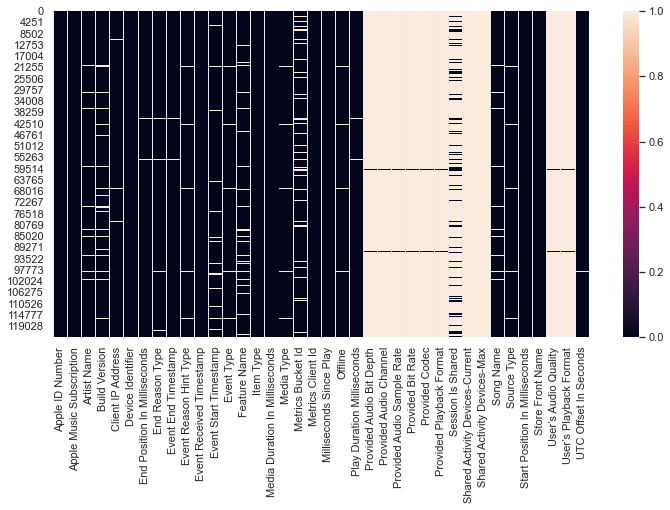

In [11]:
sns.heatmap(music_df.isnull())

The DataFrame has many columns that are almost filled with NULL VALUES. These columns need to be removed. The target is to get the heatmap above to be as dark as possible.

In [12]:
for col in music_df.columns:
    if music_df[col].isnull().all() == True:
        print(col)

Shared Activity Devices-Current
Shared Activity Devices-Max


In [13]:
np.unique(music_df['Shared Activity Devices-Current'].isnull(),return_counts=True)


(array([ True]), array([123261], dtype=int64))

In [14]:
music_df['Provided Bit Rate'].isnull().value_counts()[True]


121903

In [15]:
nans = []

for col in music_df.columns:
    if music_df[col].isnull().all() == True:
        nans.append(col)
    elif music_df[col].isnull().value_counts()[False] < 100000:
        nans.append(col)

music_df.drop(nans,axis=1,inplace=True)


In [16]:
print(f'Rows x Colums: {music_df.shape}')

Rows x Colums: (123261, 27)


The number of columns has reduced from 38 to 27

<AxesSubplot:>

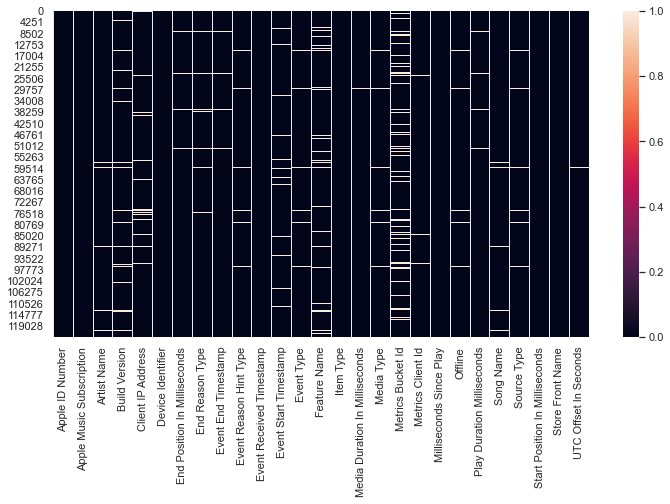

In [17]:
sns.heatmap(data=music_df.isnull())

In [18]:
music_df.isnull().sum()

Apple ID Number                       0
Apple Music Subscription             38
Artist Name                        3511
Build Version                      7331
Client IP Address                  3237
Device Identifier                     1
End Position In Milliseconds       1225
End Reason Type                    2689
Event End Timestamp                1225
Event Reason Hint Type             2688
Event Received Timestamp              0
Event Start Timestamp              5682
Event Type                         2688
Feature Name                      10341
Item Type                             0
Media Duration In Milliseconds      203
Media Type                         2455
Metrics Bucket Id                 12849
Metrics Client Id                   908
Milliseconds Since Play               0
Offline                            2015
Play Duration Milliseconds         1225
Song Name                          3511
Source Type                        2474
Start Position In Milliseconds        0


There are column's like ID which are not going to contribute much in the analysis. So we will drop these columns as well manually.

In [19]:
to_delete = ['Apple ID Number', 'Build Version', 'Client IP Address', 'Device Identifier', 'Metrics Bucket Id', 'Metrics Client Id', 'UTC Offset In Seconds']
music_df.drop(to_delete, axis=1, inplace=True)

In [20]:
music_df.isnull().sum()

Apple Music Subscription             38
Artist Name                        3511
End Position In Milliseconds       1225
End Reason Type                    2689
Event End Timestamp                1225
Event Reason Hint Type             2688
Event Received Timestamp              0
Event Start Timestamp              5682
Event Type                         2688
Feature Name                      10341
Item Type                             0
Media Duration In Milliseconds      203
Media Type                         2455
Milliseconds Since Play               0
Offline                            2015
Play Duration Milliseconds         1225
Song Name                          3511
Source Type                        2474
Start Position In Milliseconds        0
Store Front Name                      0
dtype: int64

## Converting timestamp columns to actual TimeStamp

In [21]:
music_df['Event End Timestamp'] = pd.to_datetime(music_df['Event End Timestamp'], format='%Y-%m-%dT%H:%M:%S')
music_df['Event Received Timestamp'] = pd.to_datetime(music_df['Event Received Timestamp'], format='%Y-%m-%dT%H:%M:%S')
music_df['Event Start Timestamp'] = pd.to_datetime(music_df['Event Start Timestamp'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
music_df.head()

Apple Music Subscription Artist Name  End Position In Milliseconds  \
0                     True        CKay                           0.0   
1                     True    DanDizzy                      184830.0   
2                     True      Khalid                      209606.0   
3                     True       Migos                       28470.0   
4                     True       Migos                        9947.0   

            End Reason Type              Event End Timestamp  \
0    TRACK_SKIPPED_FORWARDS 2022-02-20 20:15:43.618000+00:00   
1      NATURAL_END_OF_TRACK 2019-07-22 17:24:17.954000+00:00   
2      NATURAL_END_OF_TRACK 2019-01-01 12:53:23.511000+00:00   
3  PLAYBACK_MANUALLY_PAUSED 2020-12-10 20:56:45.550000+00:00   
4                 SCRUB_END 2020-12-10 20:56:49.556000+00:00   

  Event Reason Hint Type         Event Received Timestamp  \
0          NOT_SPECIFIED        2022-02-20 20:15:44+00:00   
1          NOT_SPECIFIED 2019-07-22 17:24:18.165000+00:00   
2          NOT_SPECIFIED 2019-01-01 12:53:23.783000+00:00   
3          NOT_SPECIFIED 2020-12-10 20:56:45.619000+00:00   
4          NOT_SPECIFIED 2020-12-10 20:56:50.257000+00:00   

             Event Start Timestamp Event Type                  Feature Name  \
0 2022-02-20 20:15:43.618000+00:00   PLAY_END                   now_playing   
1 2019-07-22 17:21:13.124000+00:00   PLAY_END     library / playlist_detail   
2 2019-01-01 12:49:53.905000+00:00   PLAY_END     library / playlist_detail   
3 2020-12-10 20:56:43.152000+00:00   PLAY_END  listen_now / playlist_detail   
4                              NaT   PLAY_END  listen_now / playlist_detail   

              Item Type  Media Duration In Milliseconds Media Type  \
0  ITUNES_STORE_CONTENT                        122347.0      AUDIO   
1  ITUNES_STORE_CONTENT                        184830.0      AUDIO   
2  ITUNES_STORE_CONTENT                        209606.0      AUDIO   
3  ITUNES_STORE_CONTENT                        364088.0      AUDIO   
4  ITUNES_STORE_CONTENT                        364088.0      AUDIO   

   Milliseconds Since Play Offline  Play Duration Milliseconds  \
0                      382   False                         0.0   
1                      211   False                    184830.0   
2                      272   False                    209606.0   
3                       69   False                      2398.0   
4                      701   False                     -5968.0   

                          Song Name         Source Type  \
0      Show My Side (feat. Amaarae)  ORIGINATING_DEVICE   
1                 Uncle Shuga Daddy  ORIGINATING_DEVICE   
2                   Saturday Nights  ORIGINATING_DEVICE   
3  Kelly Price (feat. Travis Scott)  ORIGINATING_DEVICE   
4  Kelly Price (feat. Travis Scott)  ORIGINATING_DEVICE   

   Start Position In Milliseconds Store Front Name  
0                               0          Nigeria  
1                               0          Nigeria  
2                               0          Nigeria  
3                           26072          Nigeria  
4                           15915          Nigeria

## DATA ANALYSIS

### Questions to ask for data analysis

1. Who are the top 10 favourite artists?
2. Which are the top 10 songs played?
3. Which are the top 10 songs that were listened to for the longest?
4. What is the most recurrent reason to end a song?
5. Do you prefer to listen to music when you are online or offline?
6. What time do you prefer to listen to music?
7. Which was your most active day of the week? avg daily listen time?
8. Which was your most active month? avg monthly listen time?
9. Which was your most active year? avg yearly listen time?
10. Total time spent listening to music?


### What are the top 10 favourite artists?

In [23]:
top_10_artist = music_df['Artist Name'].value_counts()[:10]
top_10_artist

Burna Boy        9101
Drake            5478
Wizkid           3318
Migos            2674
Justin Bieber    2524
Chris Brown      2173
Davido           1754
Khalid           1329
Tekno            1251
DJ Khaled        1188
Name: Artist Name, dtype: int64

### Which are the top 10 songs played?

In [24]:
fig = px.bar(data_frame=top_10_artist,title='Top 10 Favourite Artists',labels={'index':'Artists','value':'No of times songs played'})
fig.show()

In [25]:
top_20_songs = music_df['Song Name'].value_counts()[:20]
top_20_songs

Panda                                                 537
Gbona                                                 438
Rock Your Body                                        389
No Guidance (feat. Drake)                             372
Ye                                                    322
Heavens Gate                                          319
Bank On It                                            285
Ginger (feat. Burna Boy)                              277
Pretty Little Fears (feat. J. Cole)                   276
Soco (feat. Wizkid, Ceeza Milli, Spotless & Terri)    273
Jogodo                                                250
Blow My Mind                                          248
Blessed (feat. Damian "Jr. Gong" Marley)              244
No Stress                                             242
Gwarn (feat. Burna Boy)                               235
Heat (feat. Gunna)                                    221
PuTTin                                                218
Life Is Good (

In [26]:
fig = px.bar(data_frame=top_20_songs,title='Top 20 Favourite Songs',labels={'index':"Song Title","value":'Number of plays'})
fig.show()

### Which are the top 10 songs that were listened to for the longest?

In [27]:
top_10_playtime = music_df.groupby('Song Name')['Play Duration Milliseconds'].sum().sort_values(ascending=False)[:10]
top_10_playtime

Song Name
Rock Your Body                                        45125975.0
Gbona                                                 38223743.0
No Guidance (feat. Drake)                             37226930.0
Ye                                                    36905884.0
Blessed (feat. Damian "Jr. Gong" Marley)              33177783.0
Soco (feat. Wizkid, Ceeza Milli, Spotless & Terri)    31101138.0
Jogodo                                                30536288.0
Ginger (feat. Burna Boy)                              29804814.0
Bank On It                                            29610030.0
Gwarn (feat. Burna Boy)                               29160108.0
Name: Play Duration Milliseconds, dtype: float64

In [28]:
fig = px.bar(data_frame=top_10_playtime,labels={'index':'Song Names','value':'Duration of play'})
fig.show()

### What is the most recurrent reason to end a song?

In [31]:
song_end_reason = music_df['End Reason Type'].value_counts()
song_end_reason

NATURAL_END_OF_TRACK                         36716
TRACK_SKIPPED_FORWARDS                       31712
PLAYBACK_MANUALLY_PAUSED                     20570
SCRUB_END                                     7263
SCRUB_BEGIN                                   7246
MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM     6467
NOT_APPLICABLE                                3373
PLAYBACK_SUSPENDED                            2905
OTHER                                         2075
TRACK_SKIPPED_BACKWARDS                       2066
FAILED_TO_LOAD                                 166
PLAYBACK_STOPPED_DUE_TO_SESSION_TIMEOUT          9
EXITED_APPLICATION                               4
Name: End Reason Type, dtype: int64

In [43]:
fig = px.pie(music_df,names='End Reason Type',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Do you prefer to listen to music when you are online or offline?

In [45]:
online_or_offline = music_df['Offline'].value_counts()
online_or_offline

False    118663
True       2583
Name: Offline, dtype: int64

In [47]:
fig = px.pie(music_df,names='Offline')
fig.show()

### What time do you prefer to listen to music?

In [48]:
music_df['Event Start Timestamp']

0        2022-02-20 20:15:43.618000+00:00
1        2019-07-22 17:21:13.124000+00:00
2        2019-01-01 12:49:53.905000+00:00
3        2020-12-10 20:56:43.152000+00:00
4                                     NaT
                       ...               
123256   2019-06-11 13:37:00.920000+00:00
123257   2021-02-09 09:55:40.184000+00:00
123258   2020-09-24 08:52:18.984000+00:00
123259   2020-08-26 16:43:40.909000+00:00
123260   2022-02-21 07:22:59.407000+00:00
Name: Event Start Timestamp, Length: 123261, dtype: datetime64[ns, UTC]

In [50]:
#Converting event start timestamp to separate time section
music_df['Event Start Time'] = music_df['Event Start Timestamp'].dt.time
music_df['Event Start Time'].head()

0    20:15:43.618000
1    17:21:13.124000
2    12:49:53.905000
3    20:56:43.152000
4                NaT
Name: Event Start Time, dtype: object

In [53]:
hours = music_df['Event Start Time'].groupby(music_df['Event Start Timestamp'].dt.hour).count()
hours

Event Start Timestamp
0.0      649
1.0      477
2.0      356
3.0      356
4.0      370
5.0     2058
6.0     5805
7.0     8441
8.0     7986
9.0     8066
10.0    8026
11.0    7981
12.0    7412
13.0    7996
14.0    7275
15.0    7079
16.0    6764
17.0    6654
18.0    7545
19.0    6022
20.0    4421
21.0    3146
22.0    1560
23.0    1134
Name: Event Start Time, dtype: int64

In [55]:
fig = px.bar(hours, title="Most active hours (24hr)", labels={"value": "count", "Event Start Timestamp":"Timings (hours)"})
fig.update_xaxes(dtick=1)
fig.show()

In [57]:
months = music_df['Event Start Time'].groupby(music_df['Event Start Timestamp'].dt.month).count()
months

Event Start Timestamp
1.0     12716
2.0      8716
3.0     11815
4.0      7719
5.0      9673
6.0      8715
7.0      9499
8.0      9492
9.0     10830
10.0     7963
11.0     8596
12.0    11845
Name: Event Start Time, dtype: int64

In [76]:
m = 'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split()
fig = px.bar(months, title='Most Active Months',text=m,labels={'value':'Count','Event Start Timestamp':'Months'})
fig.update_xaxes(dtick=1)
fig.show()

In [65]:
years = music_df['Event Start Time'].groupby(music_df['Event Start Timestamp'].dt.year).count()
years

Event Start Timestamp
2015.0      911
2016.0     2900
2017.0       12
2018.0     7898
2019.0    25006
2020.0    33456
2021.0    34270
2022.0    13126
Name: Event Start Time, dtype: int64

In [72]:
fig = px.bar(years,title='Most active Years',labels={'value':'Count','Event Start Timestamp':'Years'})
fig.show()

#### Some points about my yearly trend:

1. I started using apple music when it launched on my iPod in 2015 but only used it sparingly
2. Due to CBN ban on naira debit card transactions, I could not subscribe for Apple Music in 2017.
3. I started driving activiely in 2019 and I play music in the car from my phone and so that explains the exponetial rise in listening time.

### Total time spent listening to music

In [77]:
total_time = music_df['Play Duration Milliseconds'].sum()

In [85]:
total_mins = total_time/60000
print('Total minutes spent: {:.2f} mins'.format(total_mins))
total_hours = total_mins/60
print('Total hours spent: {:.2f} hours'.format(total_hours))
total_days = total_hours/24
print('Total days spent: {:.2f} days'.format(total_days))

Total minutes spent: 353054.60 mins
Total hours spent: 5884.24 hours
Total days spent: 245.18 days


In [86]:
start_time = music_df['Event Start Timestamp'].min()
end_time = music_df['Event End Timestamp'].max()

In [87]:
total_possible_time = (end_time - start_time).days

In [88]:
total_possible_hours = total_possible_time * 24
print('Total possible time that could be spent: {:.2f} hours'.format(total_possible_hours))

Total possible time that could be spent: 60480.00 hours


Text(0.5, 1.0, 'Hours Spent Percentage')

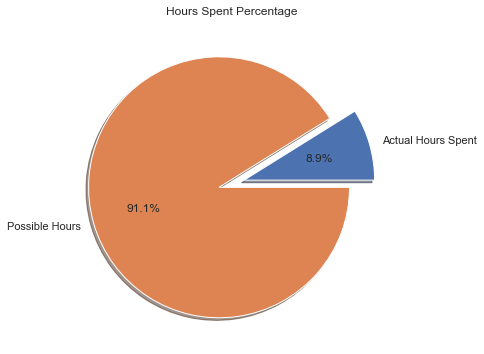

In [100]:
hours_spent_list = np.array([total_hours,total_possible_hours])
hours_spent_list_labels = ['Actual Hours Spent', "Possible Hours"]
fig, ax = plt.pyplot.subplots(figsize=(12,6))
ax.pie(hours_spent_list,labels=hours_spent_list_labels,explode=[0.1,0.1],shadow=True,autopct='%1.1f%%')
plt.pyplot.title('Hours Spent Percentage')

### Daily Average Songs Played

In [107]:
total_songs = music_df.shape[0]
print('Daily average of songs played: {:.2f}'.format(total_songs/total_possible_time))

Daily average of songs played: 48.91
